# FINAL PROJECT THICKET

In [49]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [50]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/random/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/perturbed/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/sorted/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/reverse/*.cali"))

# CUDA Thicket Variables

In [51]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/cuda/random2/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/cuda/perturbed2/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/cuda/sorted2/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/cuda/reverse2/*.cali"))

In [52]:
tks = {}

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk


In [53]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["cuda_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  └─ 1.000 comm_small
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [54]:
# Performance data
for inputType in tks.keys():
    if "mpi" in inputType:
        tks[inputType].metadata["values_per_proc"] = tks[inputType].metadata["InputSize"] // tks[inputType].metadata["num_procs"]
        
tks["mpi_random"].metadata

cali.caliper.version  mpi.world.size  \
profile                                           
126739998            2.11.0-dev              16   
135998012            2.11.0-dev              64   
170756329            2.11.0-dev             128   
236483369            2.11.0-dev              16   
279833928            2.11.0-dev               2   
391233382            2.11.0-dev              32   
477670914            2.11.0-dev               2   
678962140            2.11.0-dev              16   
777157599            2.11.0-dev               8   
777171199            2.11.0-dev              16   
814944200            2.11.0-dev               2   
942921705            2.11.0-dev             128   
953649664            2.11.0-dev               2   
973322541            2.11.0-dev               4   
1057970717           2.11.0-dev               4   
1081557958           2.11.0-dev               8   
1466031684           2.11.0-dev              32   
1470413798           2.11.0-dev              64   
1601200366           2.11.0-dev              32   
1686756245           2.11.0-dev              64   
1838211885           2.11.0-dev              32   
1841984813           2.11.0-dev             128   
1868618761           2.11.0-dev              64   
1913950878           2.11.0-dev               2   
1947517922           2.11.0-dev               4   
2197662239           2.11.0-dev               2   
2283043990           2.11.0-dev             128   
2455432849           2.11.0-dev               8   
2532419756           2.11.0-dev               4   
2563967957           2.11.0-dev              64   
2666770009           2.11.0-dev              64   
2716965437           2.11.0-dev               8   
2717719667           2.11.0-dev              32   
2749333483           2.11.0-dev               4   
2886223632           2.11.0-dev              16   
2921704373           2.11.0-dev              32   
2934121856           2.11.0-dev               8   
3070460776           2.11.0-dev             128   
3300404828           2.11.0-dev               4   
3597322656           2.11.0-dev               2   
3787455050           2.11.0-dev             128   
3794481039           2.11.0-dev               8   
3805141186           2.11.0-dev              64   
3928713240           2.11.0-dev             128   
4001942517           2.11.0-dev               8   
4003808136           2.11.0-dev               4   
4011824924           2.11.0-dev              32   
4146364712           2.11.0-dev              16   
4250107605           2.11.0-dev              16   

                                                 spot.metrics  \
profile                                                         
126739998   min#inclusive#sum#time.duration,max#inclusive#...   
135998012   min#inclusive#sum#time.duration,max#inclusive#...   
170756329   min#inclusive#sum#time.duration,max#inclusive#...   
236483369   min#inclusive#sum#time.duration,max#inclusive#...   
279833928   min#inclusive#sum#time.duration,max#inclusive#...   
391233382   min#inclusive#sum#time.duration,max#inclusive#...   
477670914   min#inclusive#sum#time.duration,max#inclusive#...   
678962140   min#inclusive#sum#time.duration,max#inclusive#...   
777157599   min#inclusive#sum#time.duration,max#inclusive#...   
777171199   min#inclusive#sum#time.duration,max#inclusive#...   
814944200   min#inclusive#sum#time.duration,max#inclusive#...   
942921705   min#inclusive#sum#time.duration,max#inclusive#...   
953649664   min#inclusive#sum#time.duration,max#inclusive#...   
973322541   min#inclusive#sum#time.duration,max#inclusive#...   
1057970717  min#inclusive#sum#time.duration,max#inclusive#...   
1081557958  min#inclusive#sum#time.duration,max#inclusive#...   
1466031684  min#inclusive#sum#time.duration,max#inclusive#...   
1470413798  min#inclusive#sum#time.duration,max#inclusive#...   
1601200366  min#inclusive#sum#time.duration,max#inclusive#...   
1686756245  min#inclusive#sum#time.duration,

In [55]:
tks.keys()

dict_keys(['mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed', 'cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed'])

In [56]:
gbs = {}

for i in tks.keys():
    if "mpi" in i:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("values_per_proc")
    else:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("InputSize")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b848b92c4f0>, 262144: <thicket.thicket.Thicket object at 0x2b8493b7dac0>, 1048576: <thicket.thicket.Thicket object at 0x2b84936f41c0>, 4194304: <thicket.thicket.Thicket object at 0x2b8492a4d7f0>, 16777216: <thicket.thicket.Thicket object at 0x2b84948797c0>, 67108864: <thicket.thicket.Thicket object at 0x2b84942de8b0>, 268435456: <thicket.thicket.Thicket object at 0x2b848556d430>}
19  thickets created...
{512: <thicket.thicket.Thicket object at 0x2b84944f9310>, 1024: <thicket.thicket.Thicket object at 0x2b84948ec280>, 2048: <thicket.thicket.Thicket object at 0x2b849480c580>, 4096: <thicket.thicket.Thicket object at 0x2b848a68f970>, 8192: <thicket.thicket.Thicket object at 0x2b8494599c40>, 16384: <thicket.thicket.Thicket object at 0x2b8494599d90>, 32768: <thicket.thicket.Thicket object at 0x2b8492592250>, 65536: <thicket.thicket.Thicket object at 0x2b848b844970>, 131072: <thicket.thicket.Thicket object at 0x2b848baa7370

11  thickets created...
{32768: <thicket.thicket.Thicket object at 0x2b848b5d5550>, 65536: <thicket.thicket.Thicket object at 0x2b848b54c850>, 131072: <thicket.thicket.Thicket object at 0x2b84940d0130>, 262144: <thicket.thicket.Thicket object at 0x2b848b4d11c0>, 524288: <thicket.thicket.Thicket object at 0x2b8494b79250>, 1048576: <thicket.thicket.Thicket object at 0x2b8494cb2430>, 2097152: <thicket.thicket.Thicket object at 0x2b8492f8fdc0>, 4194304: <thicket.thicket.Thicket object at 0x2b848a77ccd0>, 16777216: <thicket.thicket.Thicket object at 0x2b8494f2ea90>, 67108864: <thicket.thicket.Thicket object at 0x2b848a622fd0>, 268435456: <thicket.thicket.Thicket object at 0x2b84942b7f40>}
11  thickets created...
{32768: <thicket.thicket.Thicket object at 0x2b8494f7b2e0>, 65536: <thicket.thicket.Thicket object at 0x2b8493654e20>, 131072: <thicket.thicket.Thicket object at 0x2b8492cc5b20>, 262144: <thicket.thicket.Thicket object at 0x2b848b923f10>, 524288: <thicket.thicket.Thicket object at 0

Compose these 3 groups column-wise to get a holistic view of the data

In [57]:
print(gbs.keys())

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])


In [58]:
ctks = {}

for i in gbs.keys():
#     if "strong" in i:
    if "mpi" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_procs"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )

In [59]:
valsPerProcList = ctks["mpi_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")

Perform pandas operations to get the table in a desirable format for plotting

In [60]:
for i in ctks.keys():
    if "cuda" in i:
        for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
            ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

    else:
        if "strong" in i:
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            
        else: 
            for valPerProc in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(valPerProc, "nid"), (valPerProc, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            

In [61]:
ctks["mpi_sorted_weak"].dataframe

512                                          \
                     Min time/rank Max time/rank Avg time/rank  Total time   
name       num_procs                                                         
main       2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            2.850393      2.971963      2.903119  371.599183   
comm       2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.012707      0.106925      0.059502    7.616285   
comm_large 2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.012662      0.106872      0.059448    7.609385   
comm_small 2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.000004      0.000005      0.000005    0.000591   
comp       2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.000015      0.015053      0.000136    0.017440   
comp_large 2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.015025      0.015025      0.015025    0.015025   
comp_small 2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.000005      0.000022     

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [62]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker

def plot_pandas2(df, title, xlabel, ylabel, window_size, loglog):
    # Apply a rolling mean (smoothing) to the dataframe.
    # Note that 'window_size' is the number of samples to consider for the moving average.
    # You can adjust 'window_size' to control the amount of smoothing.
    df_smoothed = df.rolling(window=window_size, min_periods=1).mean()
    
    # Now plot the smoothed data
    plot = df_smoothed.plot(kind="line",
                            marker='o',
                            title=title,
                            xlabel=xlabel,
                            ylabel=ylabel,
                            grid=True,
                            loglog=loglog,
                            figsize=(10, 6))
    
    # Set the y-axis to logarithmic scale if loglog is True
    if loglog:
        plot.set_yscale('log', base=10)
        plot.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

    # Show grid and set the grid style
    plot.grid(True, which="both", ls="--", linewidth=0.5)

    return plot


# Examples

In [64]:
ctks["cuda_random_strong"].dataframe.loc["main"]

32768                                         \
            Min time/rank Max time/rank Avg time/rank Total time   
num_threads                                                        
64               0.378449      0.378449      0.378449   0.378449   
128              0.354759      0.354759      0.354759   0.354759   
256              0.357512      0.357512      0.357512   0.357512   
512              0.375736      0.375736      0.375736   0.375736   
1024             0.363768      0.363768      0.363768   0.363768   

                                                                   \
            Avg GPU time/rank Min GPU time/rank Max GPU time/rank   
num_threads                                                         
64                   0.015261          0.015261          0.015261   
128                  0.014731          0.014731          0.014731   
256                  0.014626          0.014626          0.014626   
512                  0.014319          0.014319          0.014319   
1024                 0.016521          0.016521          0.016521   

                                   65536                              \
            Total GPU time Min time/rank Max time/rank Avg time/rank   
num_threads                                                            
64                0.015261      0.370750      0.370750      0.370750   
128               0.014731      0.386538      0.386538      0.386538   
256               0.014626      0.386311      0.386311      0.386311   
512               0.014319      0.393265      0.393265      0.393265   
1024              0.016521      0.379728      0.379728      0.379728   

                                                                              \
            Total time Avg GPU time/rank Min GPU time/rank Max GPU time/rank   
num_threads                                                                    
64            0.370750          0.032383          0.032383          0.032383   
128           0.386538          0.037306          0.037306          0.037306   
256           0.386311          0.028699          0.028699          0.028699   
512           0.393265          0.037451          0.037451          0.037451   
1024          0.379728          0.031581          0.031581          0.031581   

                                  131072                              \
            Total GPU time Min time/rank Max time/rank Avg time/rank   
num_threads                                                            
64                0.032383      0.409491      0.409491      0.409491   
128               0.037306      0.417716      0.417716      0.417716   
256               0.028699      0.417758      0.417758      0.417758   
512               0.037451      0.407406      0.407406      0.407406   
1024              0.031581      0.401765      0.401765      0.401765   

                                                                              \
            Total time Avg GPU time/rank Min GPU time/rank Max GPU time/rank   
num_threads                                                                    
64            0.409491          0.066482          0.066482          0.066482   
128           0.417716          0.067202          0.067202          0.067202   
256           0.417758          0.062374          0.062374          0.062374   
512           0.407406          0.061438          0.061438          0.061438   
1024          0.401765          0.061020          0.061020          0.061020   

                                  262144                              \
            Total GPU time Min time/rank Max time/rank Avg time/rank   
num_threads                                                            
64                0.066482      0.489064      0.489064      0.489064   
128               0.067202      0.496908      0.496908      0.496908   
256               0.062374      0.501853      0.501853      0.501853   
512               0.061438      0.503225      0.503225

In [65]:
ctks.keys()

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])

In [66]:
function_names = ("main", "comm", "comp_large")

# MPI STRONG SCALING TIME PLOTS

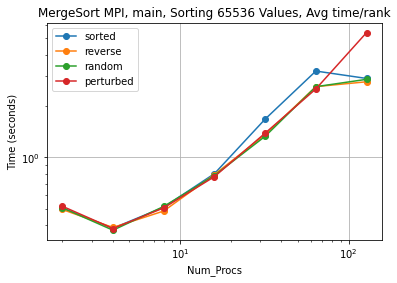

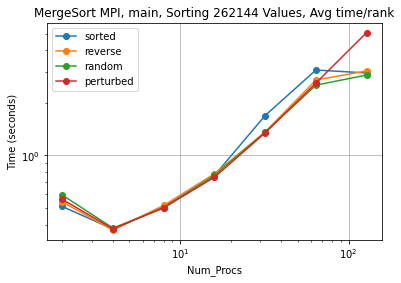

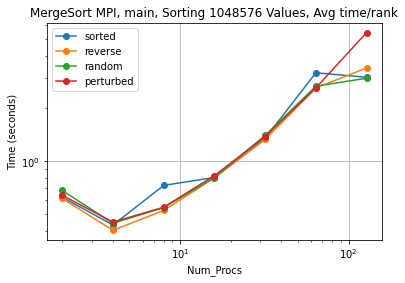

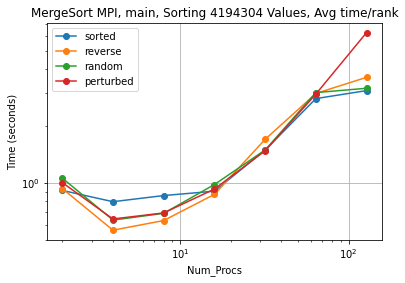

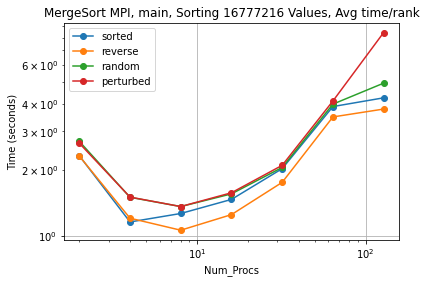

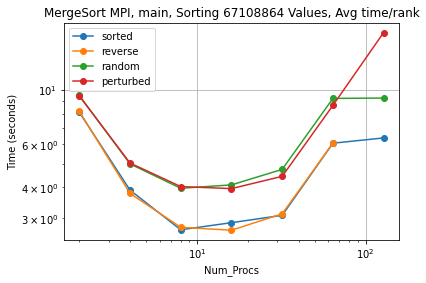

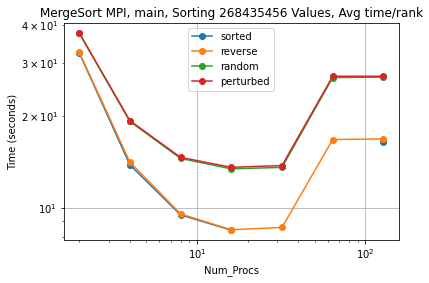

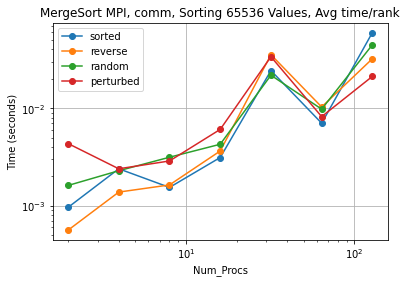

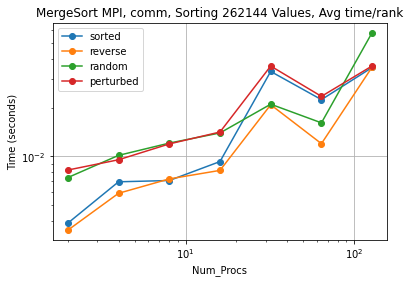

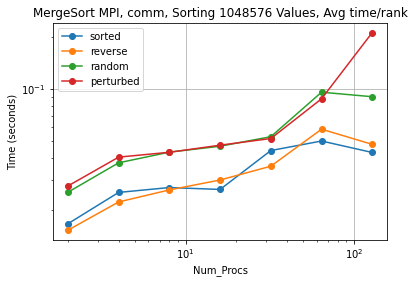

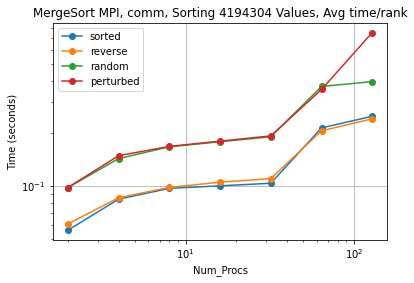

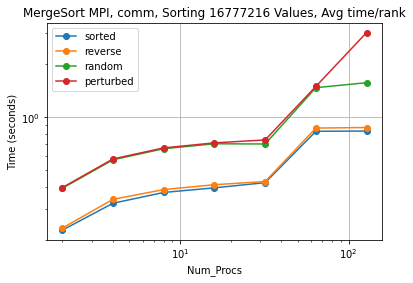

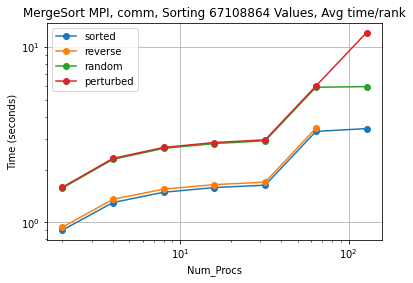

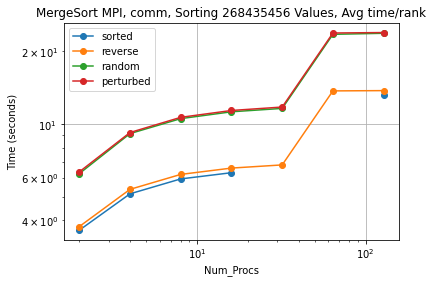

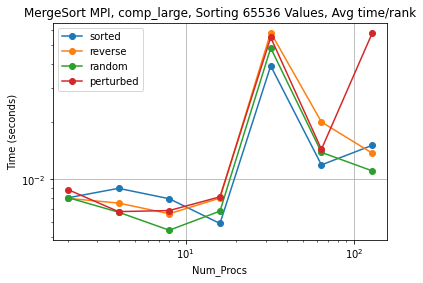

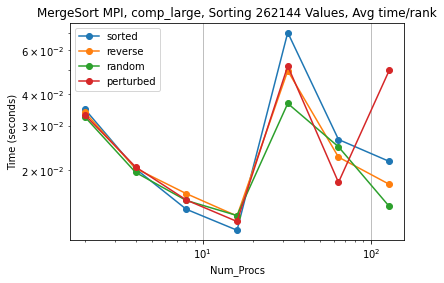

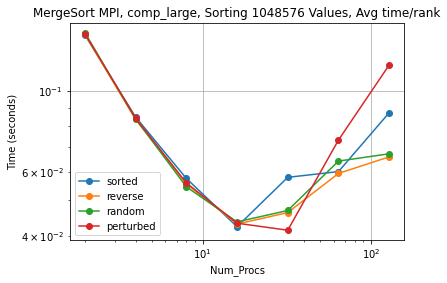

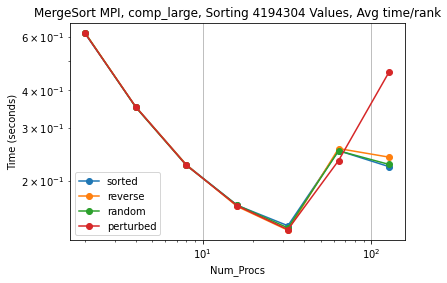

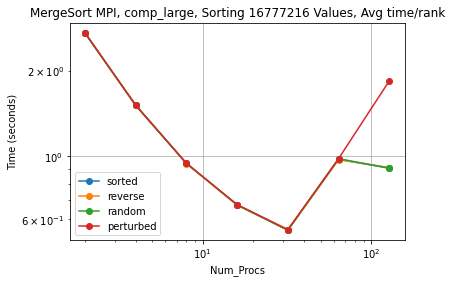

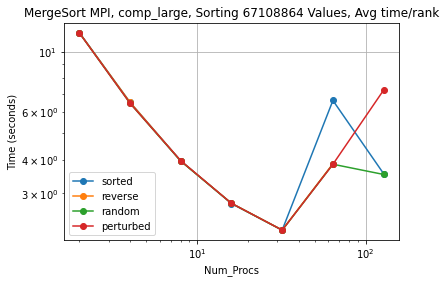

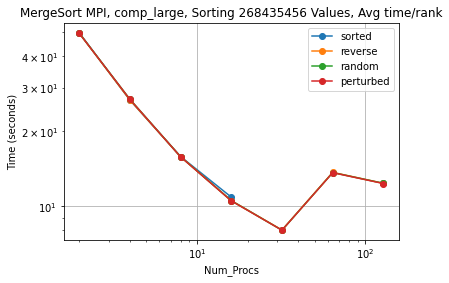

In [81]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "mpi" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="MergeSort MPI, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# MPI WEAK SCALING TIME PLOTS

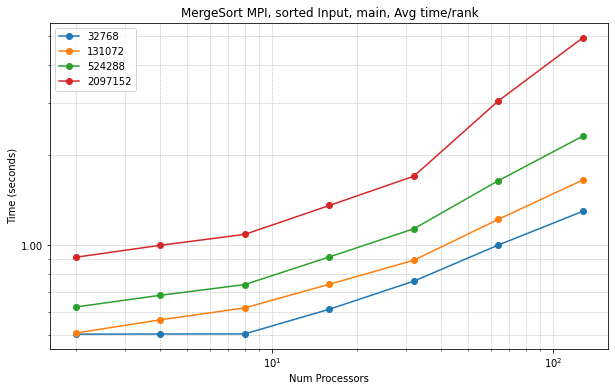

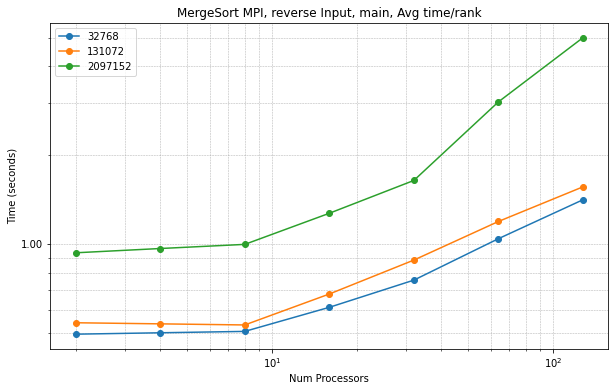

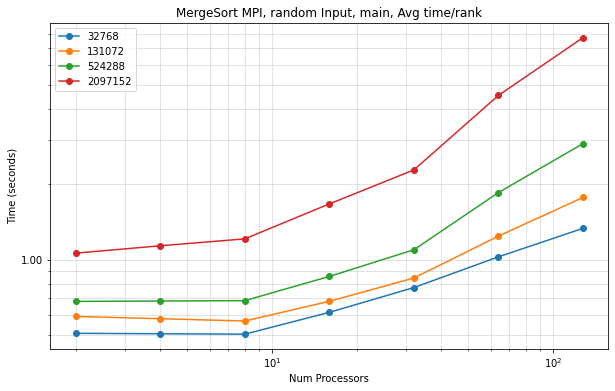

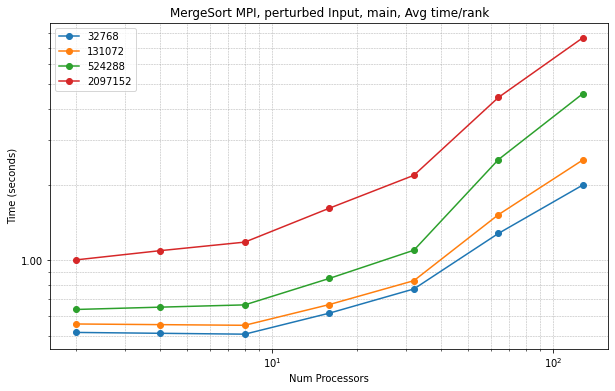

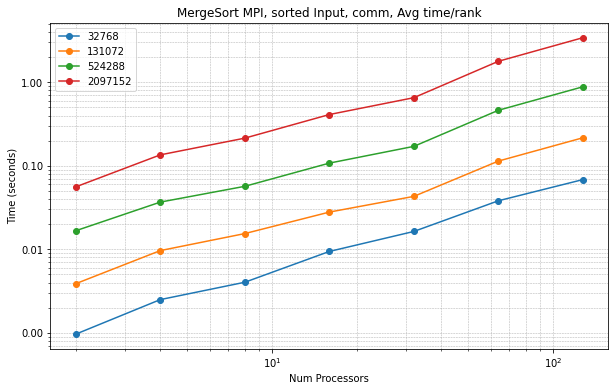

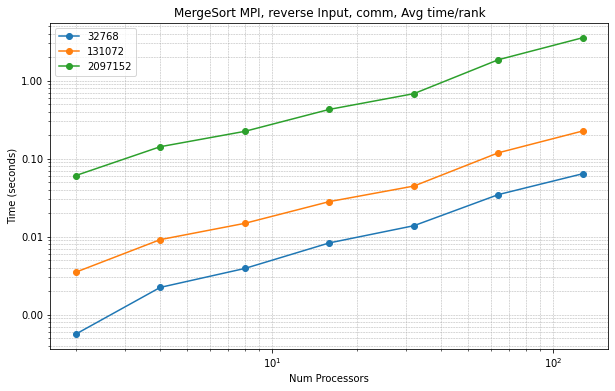

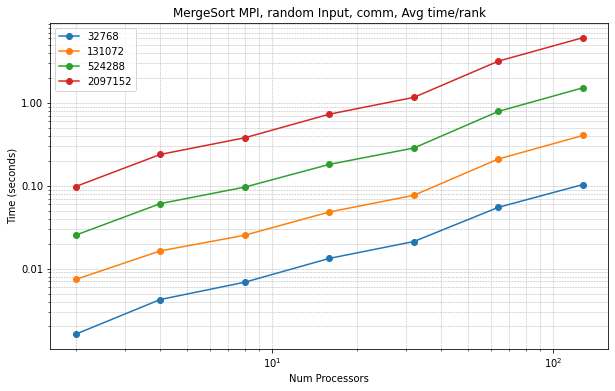

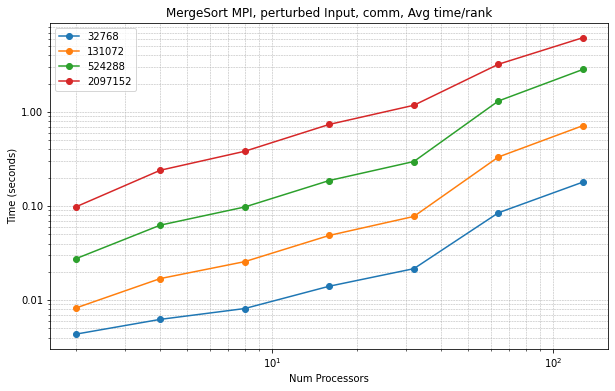

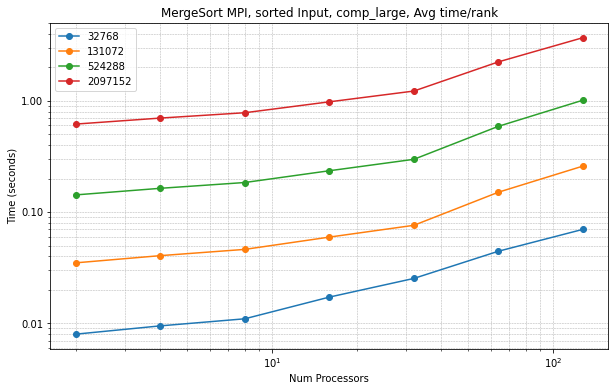

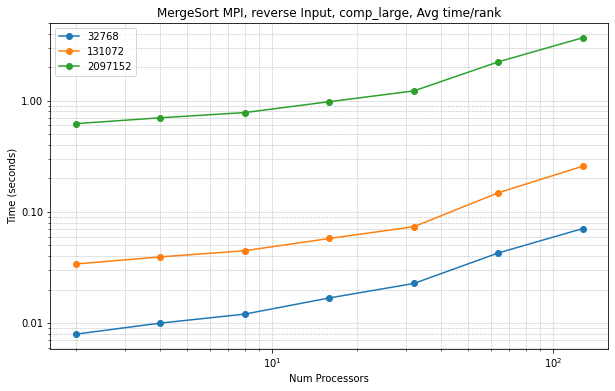

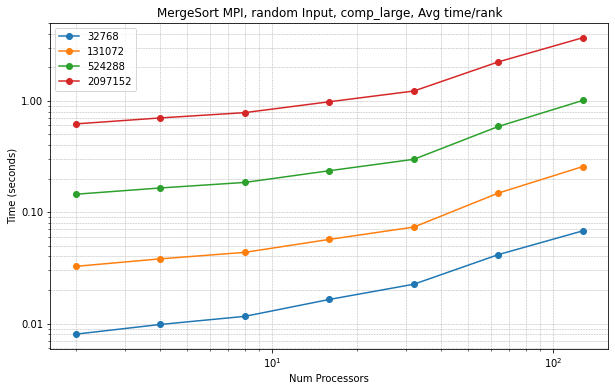

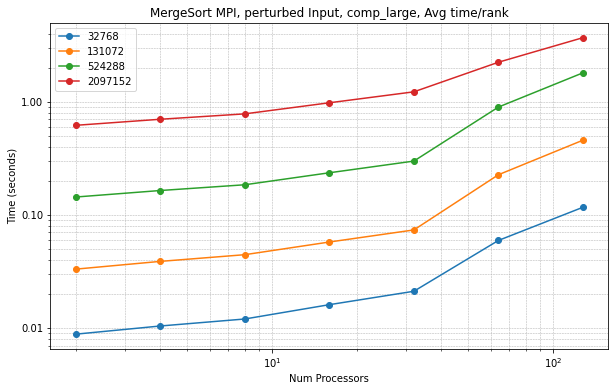

In [82]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "mpi" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]: #[262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0]: #[256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0, 16384.0, 32768.0, 65536.0, 131072.0, 262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0, 8388608.0, 16777216.0, 33554432.0, 67108864.0, 134217728.0]: # for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                #print(tempDF)
                if(count_nan(tempDF.values) > 3):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
                masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))
                
            plot_pandas2(
                df=masterDF,
                title="MergeSort MPI, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                window_size= 7,
                loglog=True
            )

# CUDA STRONG SCALING TIME PLOTS

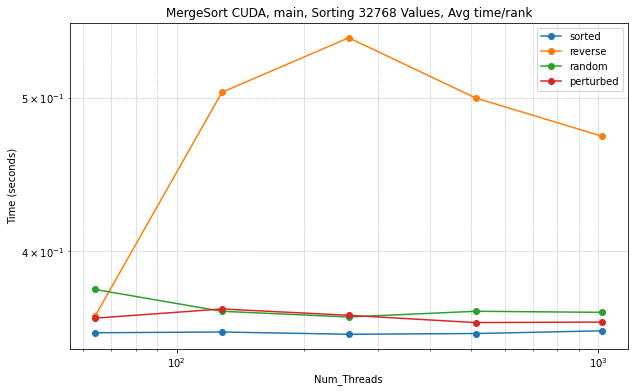

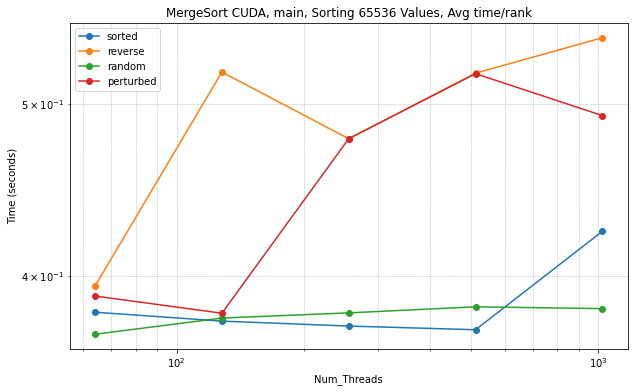

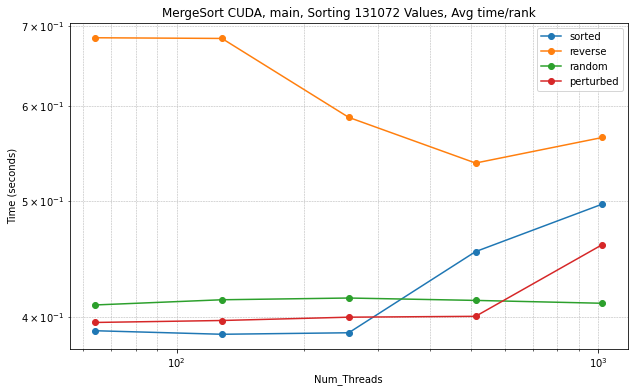

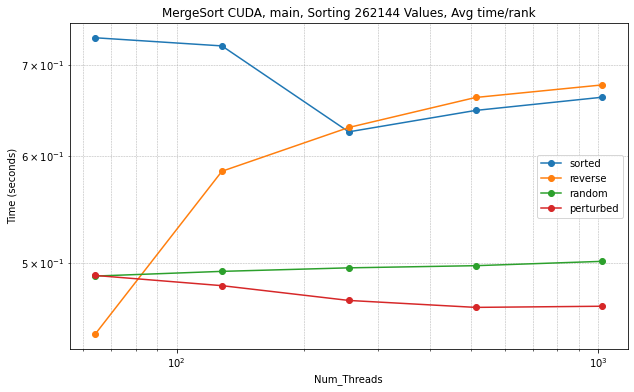

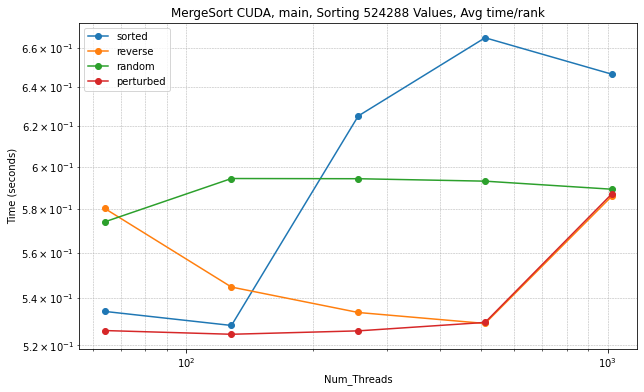

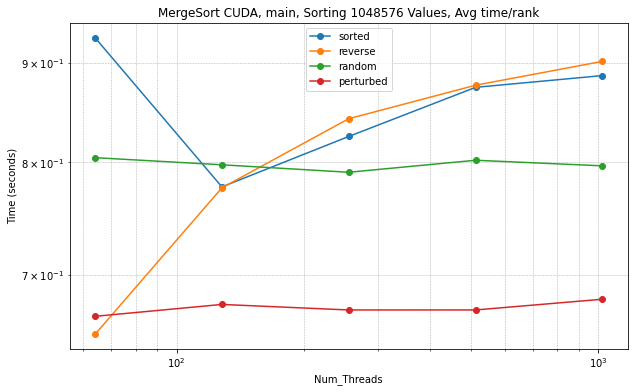

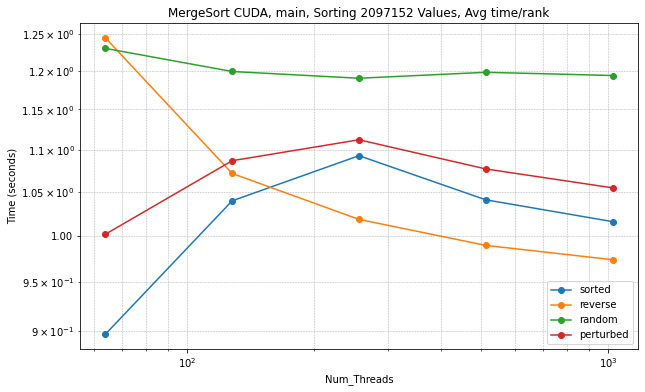

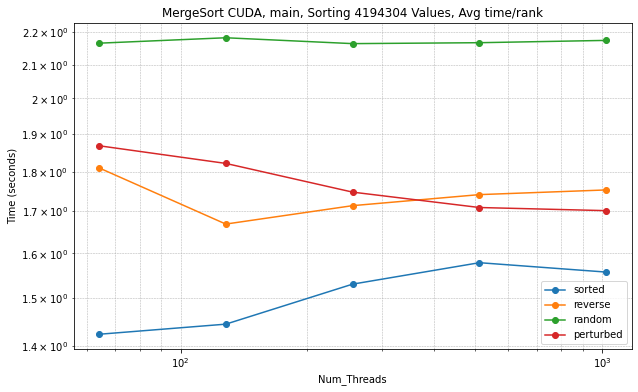

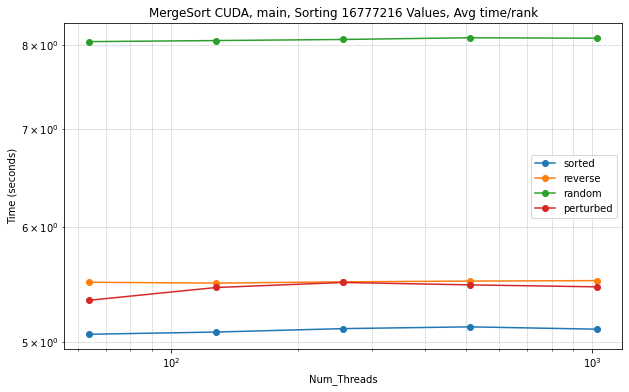

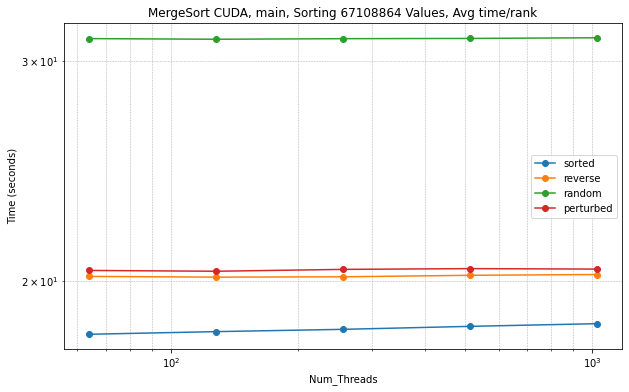

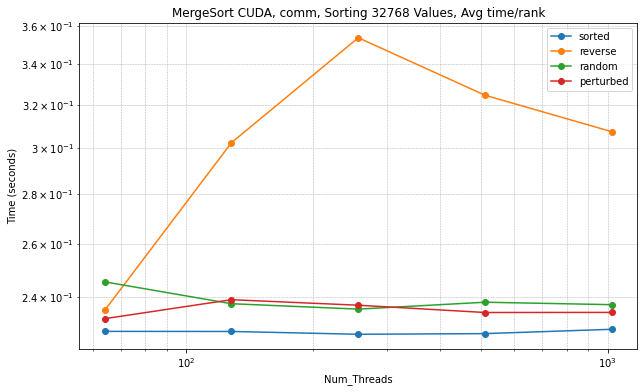

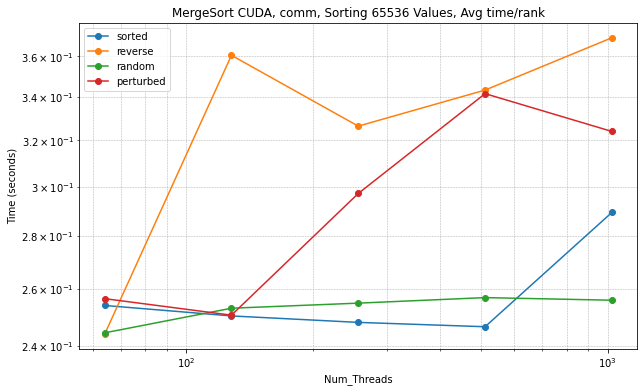

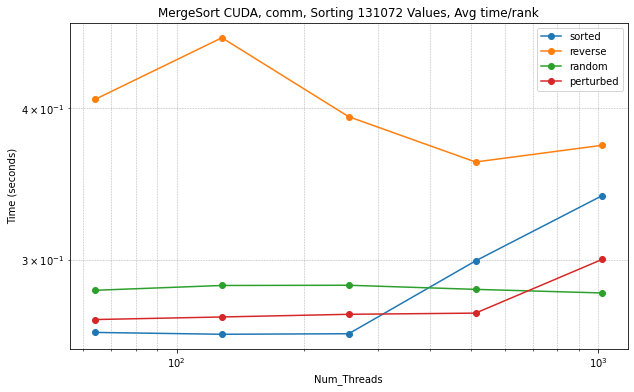

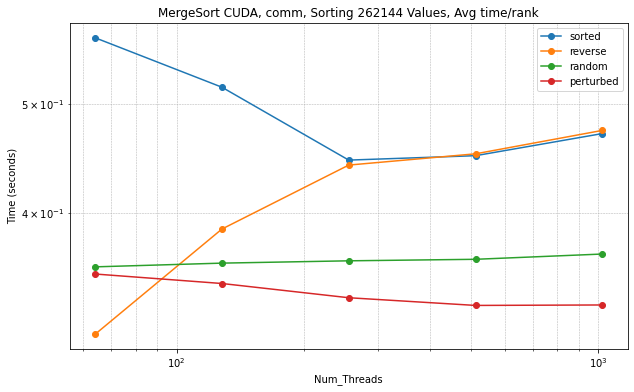

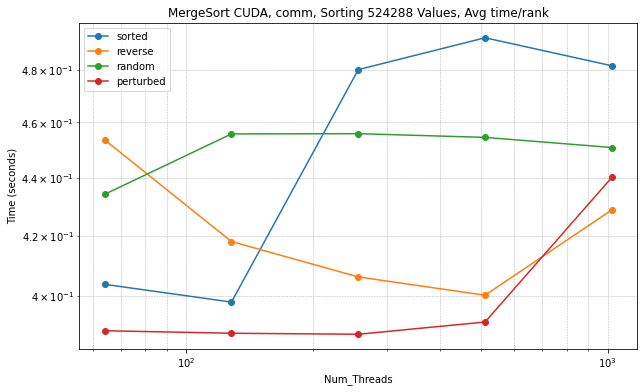

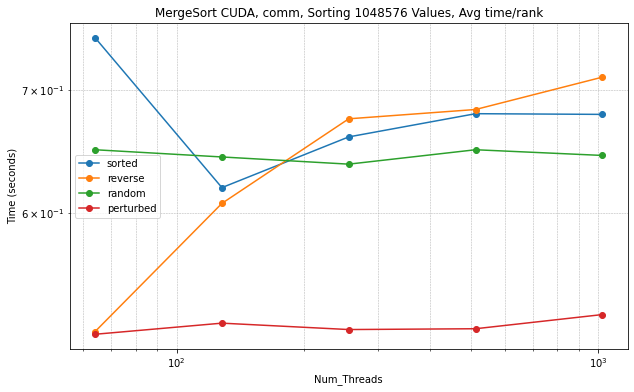

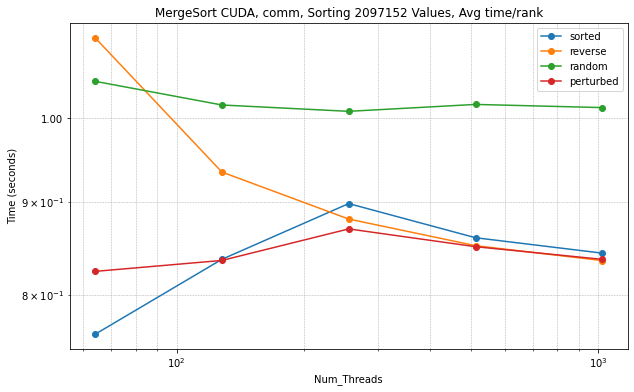

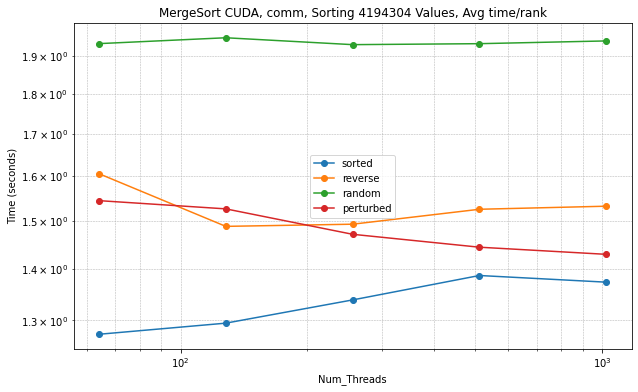

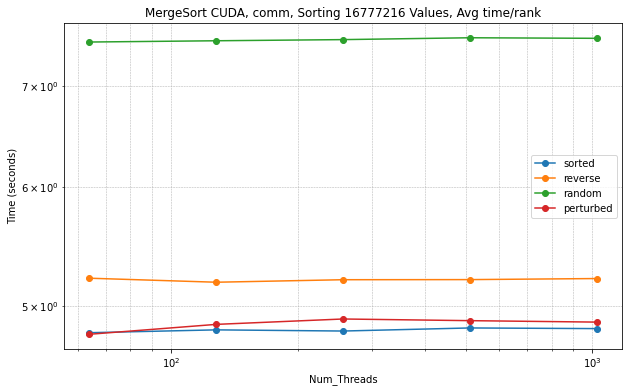

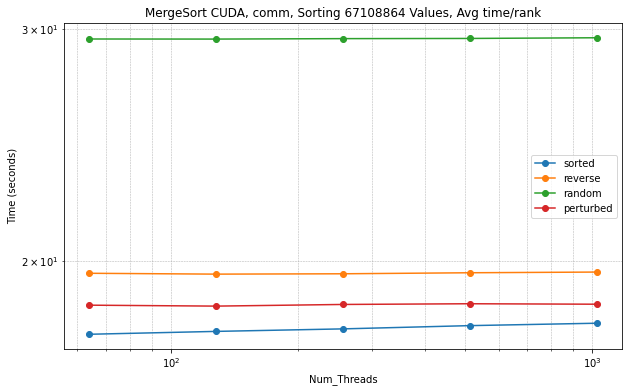

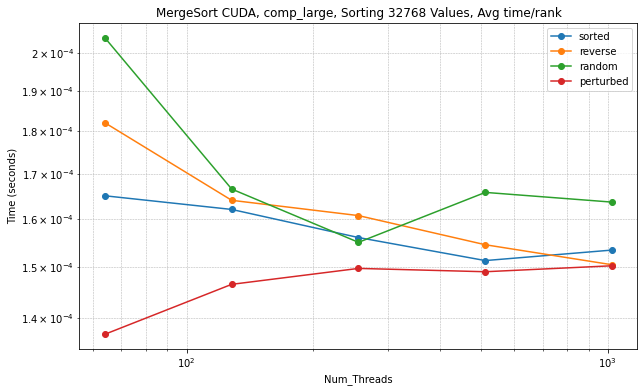

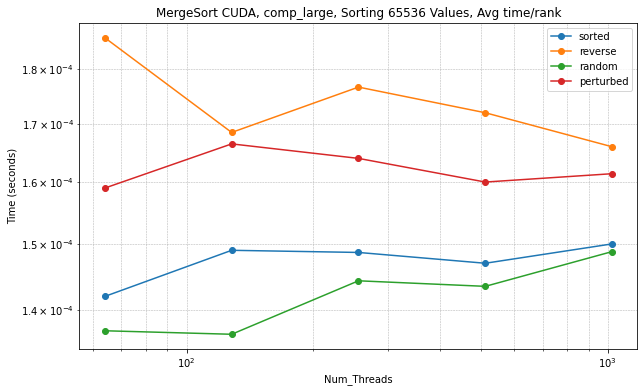

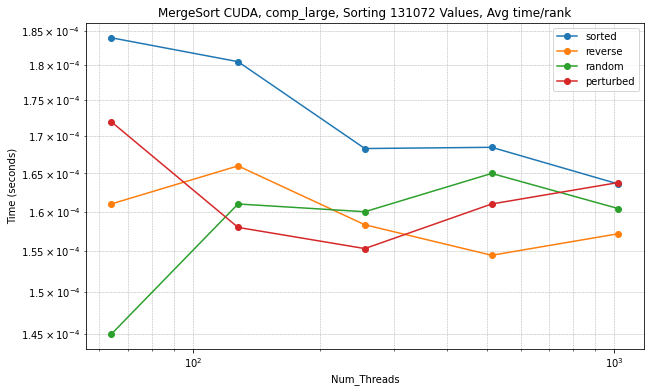

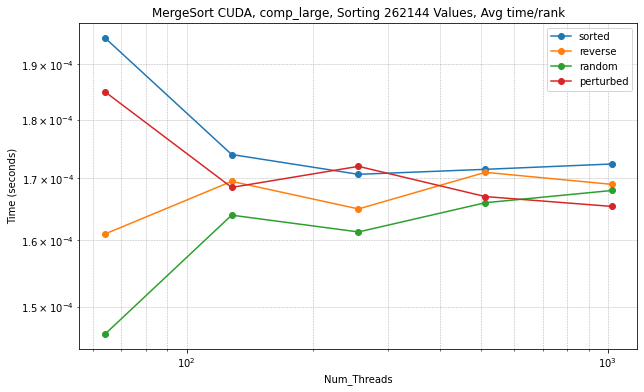

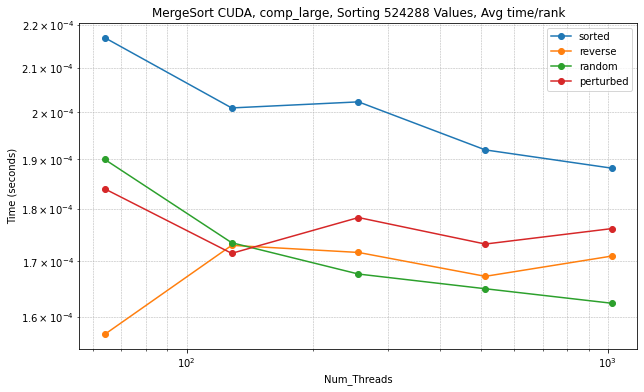

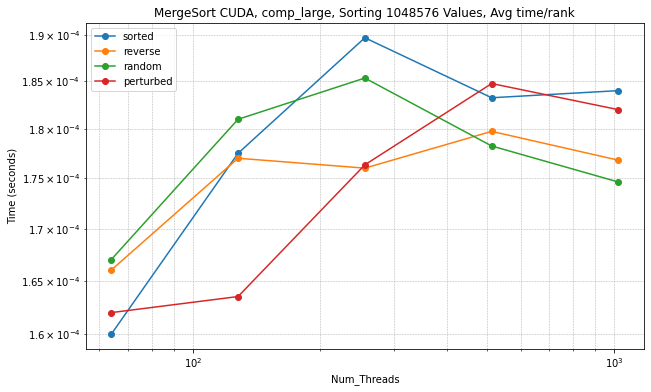

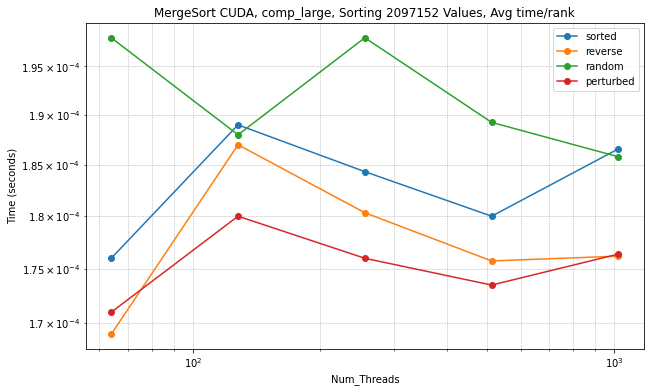

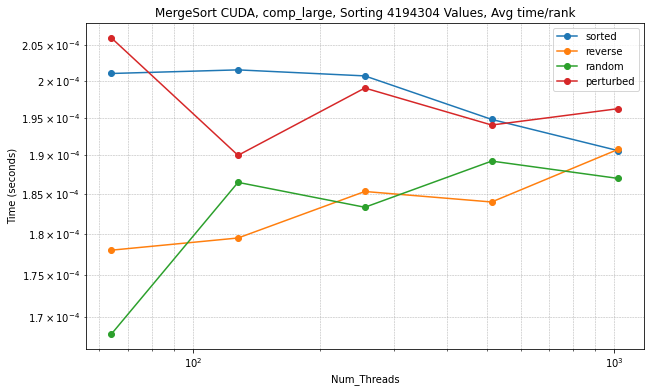

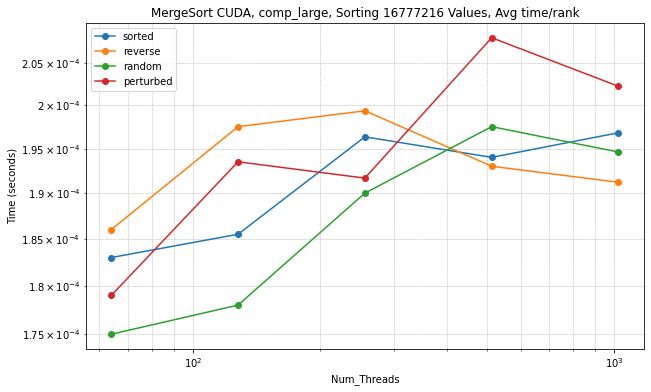

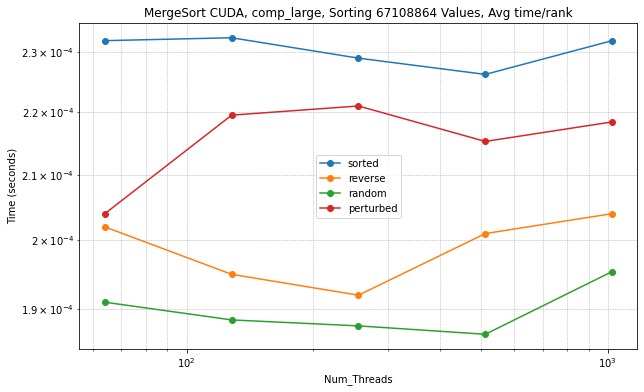

In [83]:
for name in function_names:
    for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152,4194304 , 16777216,67108864]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "cuda" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas2(
            df=masterDF,
            title="MergeSort CUDA, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Threads",
            ylabel="Time (seconds)",
            window_size=7,
            loglog=True
        )

# CUDA WEAK SCALING TIME PLOTS

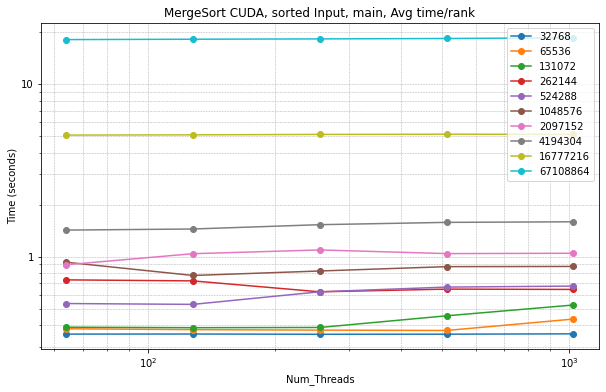

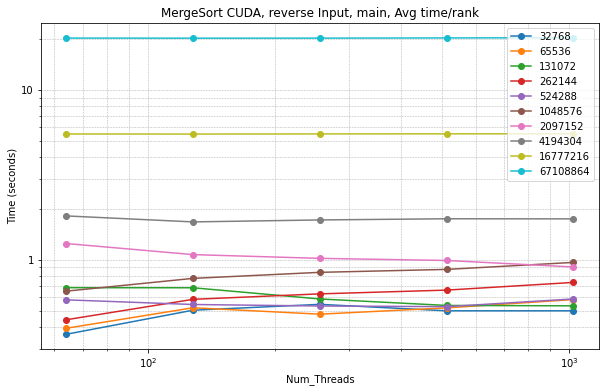

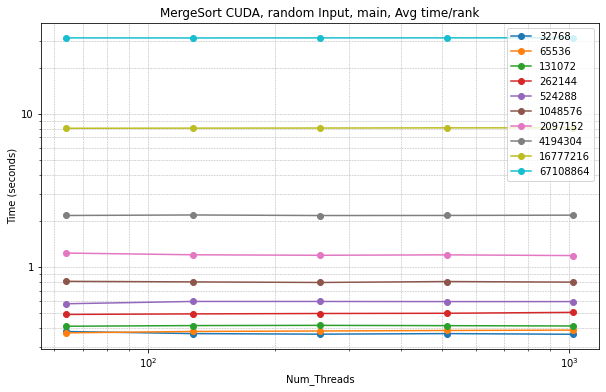

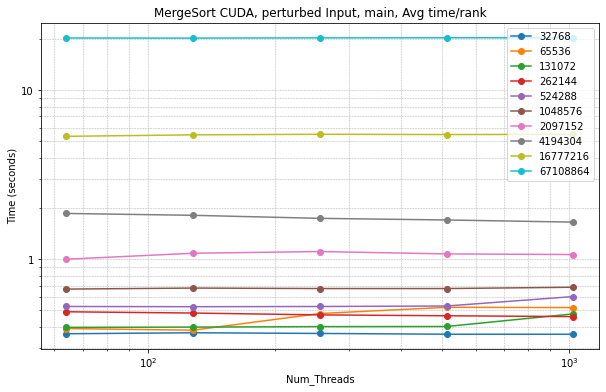

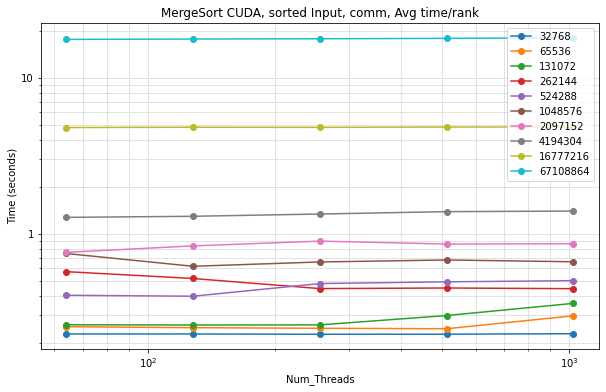

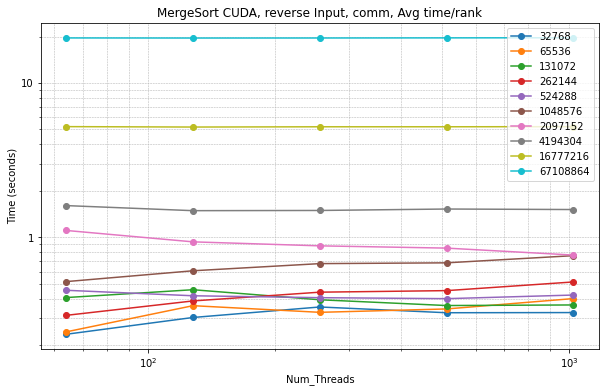

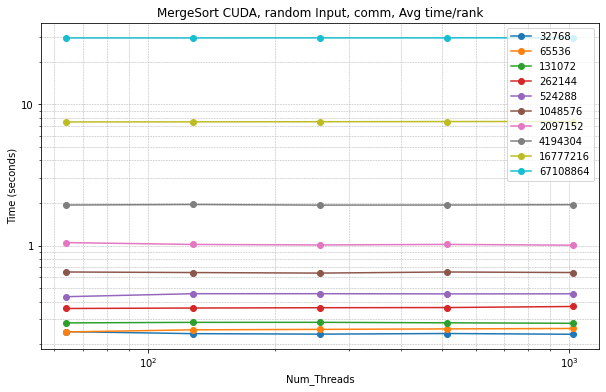

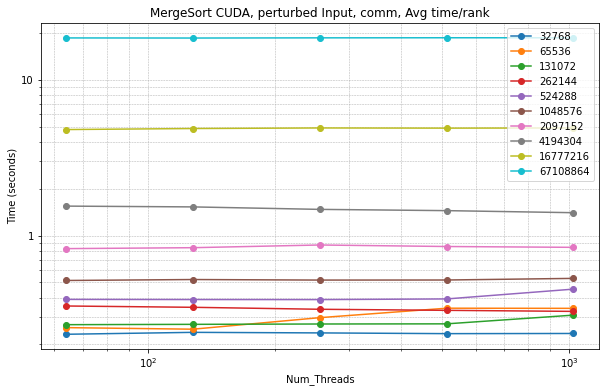

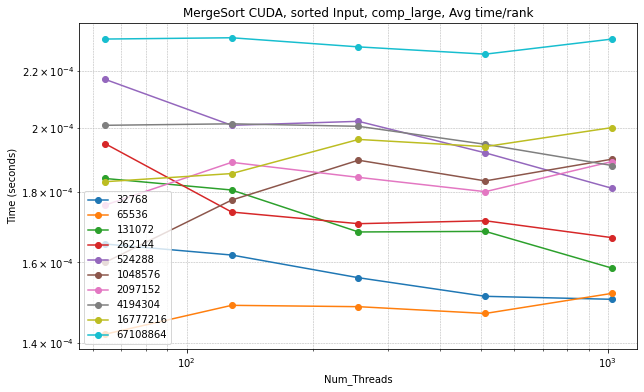

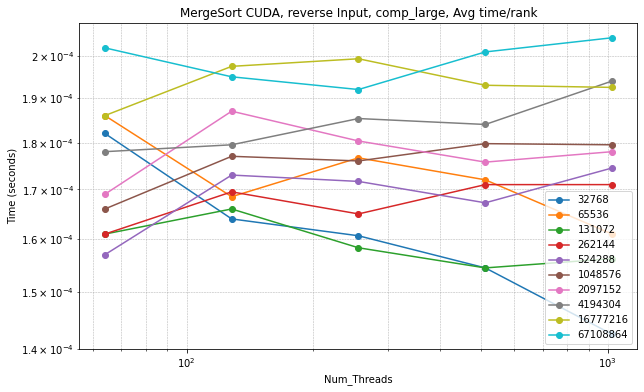

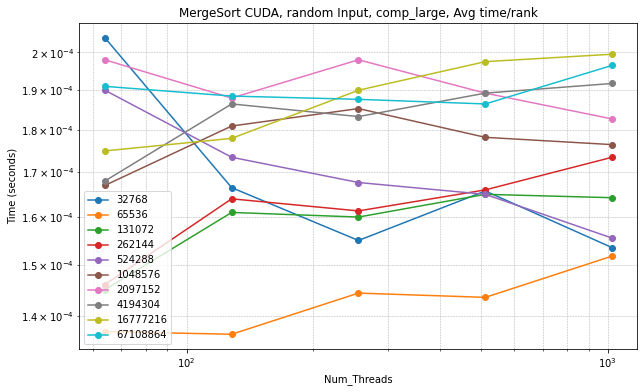

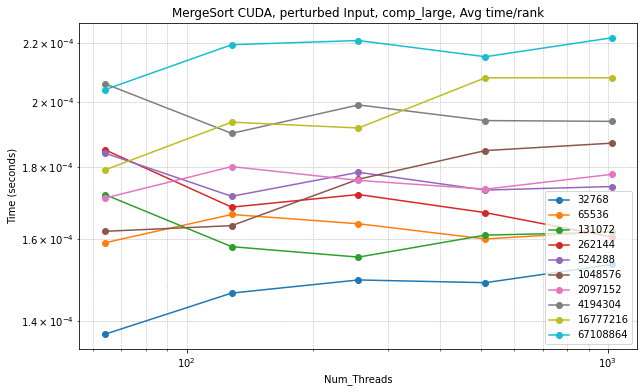

In [88]:
for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "cuda" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152,4194304 , 16777216,67108864]: #[64, 128, 256, 512, 1024]: 
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputSize)    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

            plot_pandas2(
                df=masterDF,
                title="MergeSort CUDA, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num_Threads",
                ylabel="Time (seconds)",
                window_size=4,
                loglog=True
            )

## Speedup

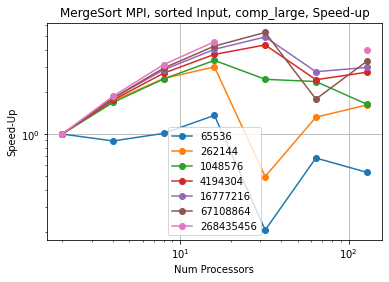

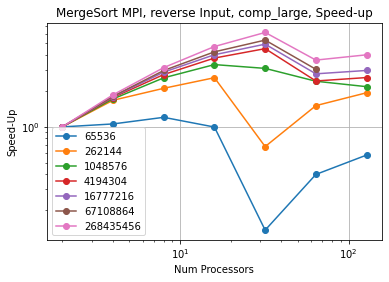

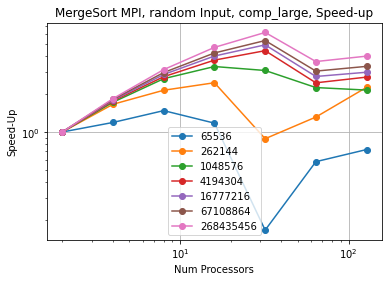

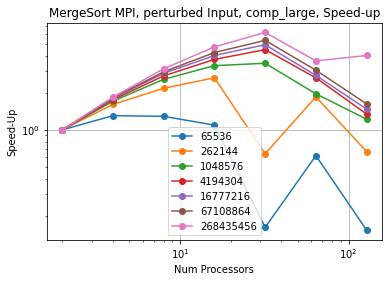

In [89]:
for inputType in ctks.keys():
    if("mpi" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
            tempDF = ctks[inputType].dataframe.loc["comp_large"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][2] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="MergeSort MPI, " + str(inputType.split("_")[1]) + " Input, comp_large, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )

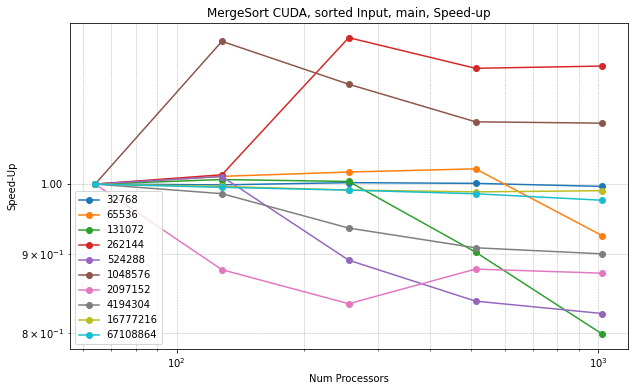

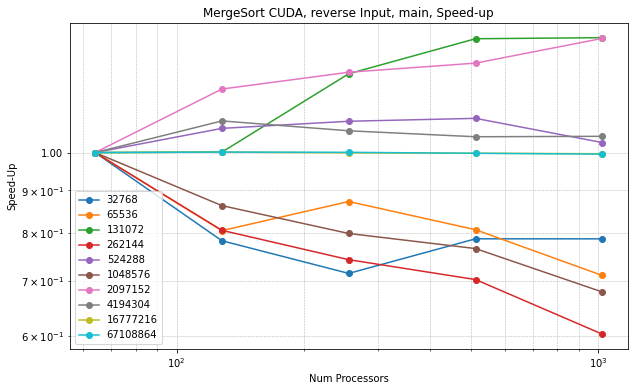

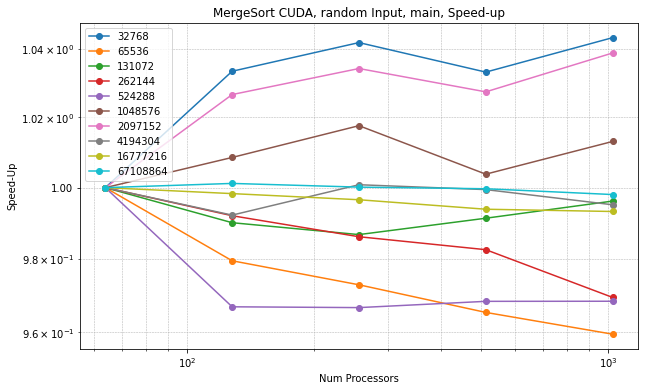

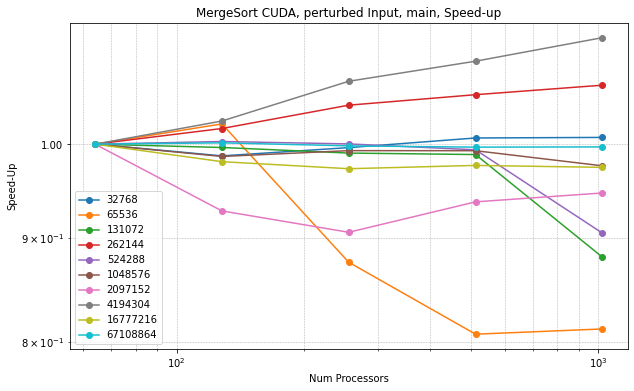

In [90]:
for inputType in ctks.keys():
    if("cuda" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152,4194304 , 16777216,67108864 ]:
            tempDF = ctks[inputType].dataframe.loc["main"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][64] / masterDF[inputSize]

        plot_pandas2(
            df=masterDF,
            title="MergeSort CUDA, " + str(inputType.split("_")[1]) + " Input, main, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            window_size=4,
            loglog=True
        )